In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
customer_data = pd.read_csv('../Social_Network_Ads.csv')

In [5]:
customer_data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
#  Split data into feature matrix (X) and target vector (y)
X = customer_data.iloc[:, :-1].values
y = customer_data.iloc[:, -1].values

In [12]:
#  Split data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Due to the large scale of values among the feature data, apply a scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
# Apply K-Nearest Neighbour (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = knn.predict(X_test)
print(y_pred)

[1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0
 1 0 1 1 0 0]


In [21]:
y_test


array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [23]:
y_test.shape

(80,)

In [31]:
# merge True and predicted values into a array
comp = np.concatenate((y_test.reshape(-1,1), y_pred.reshape(-1,1)), axis=-1)
# Turn into a table
df = pd.DataFrame(comp, columns=["True", "predicted"])

In [32]:
# replace the value by the true meaning: 1: Purchased, 0: Not Purchased
df.replace(to_replace=(0,1), value=["Not purchased", "Purchased"])

,True,predicted
0,Not purchased,Purchased
1,Purchased,Purchased
2,Not purchased,Not purchased
3,Purchased,Purchased
4,Not purchased,Not purchased
...,...,...
75,Not purchased,Not purchased
76,Purchased,Purchased
77,Purchased,Purchased
78,Not purchased,Not purchased


In [34]:
s = knn.predict(sc.transform([[30, 87000]]))
if s == [0]:
                       print("Not Purchased")
else:
                       print("Purchased")

Not Purchased


In [41]:
# get confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
confM = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

0.9125


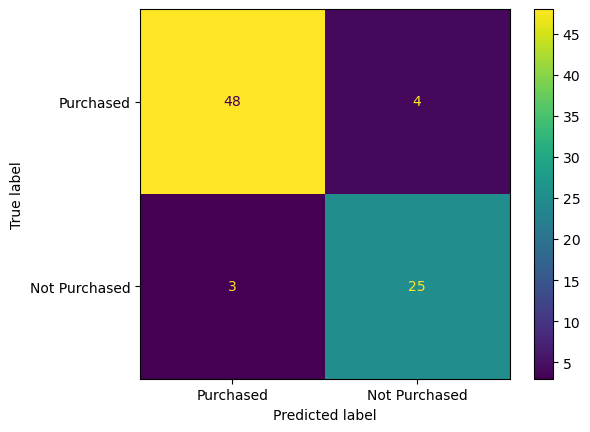

In [42]:
# visulaize confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confM, display_labels=["Purchased", "Not Purchased"]).plot()
plt.show()

C:\Users\emax4\AppData\Local\Temp\ipykernel_3852\2214026388.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


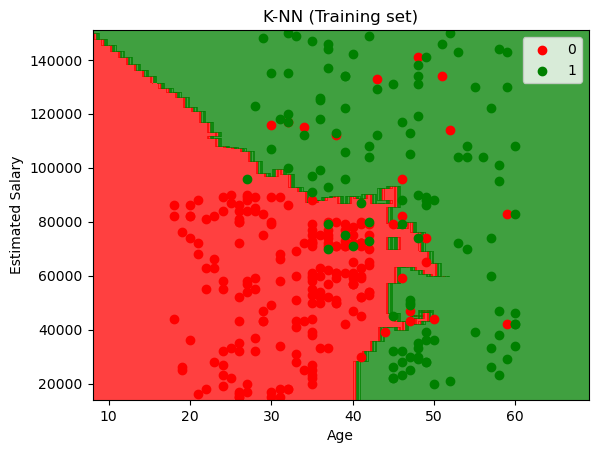

In [43]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, knn.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()